### View and compare time series


In [1]:
# Import packages
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import scipy.optimize as spop
import matplotlib.pyplot as plt

print("Yahoo Finance: ", yf.__version__)
# EM: IEMG(0.09), SPEM(0.07), VWO(0.08), EEM(0.72)
# Env/Carbon/ESG: LCTD(0.20), ICLN(0.41), ERTH(0.67)
# Quantum/AI/Tech: QTUM(0.40), BLOK(0.76), FTEC(0.08), VGT(0.09), IXN(0.41)
# IXN more global than FTEC, includes Europe, China, Japan and Australia
# SPEM doesn't have Russia, but IEMG has Russia => choose SPEM

Yahoo Finance:  0.2.55


In [4]:
stocks = ['^SPX', 'SPEM', 'QTUM', 'IXN', 'LCTD', 'BLOK'] # Watchlist
# stocks = ['IEMG', 'SPEM', 'VWO', 'EEM'] # EM
# stocks = ['ERTH', 'LCTD', 'QCLN', 'ICLN'] # Env/Carbon/ESG
# stocks = ['QTUM', 'BLOK', 'FTEC', 'IXN'] # Quantum/AI/Tech
colors = ['blue', 'red', 'green', 'brown', 'orange']
start = '2023-04-01'
end = '2025-05-31'

# Retrieving data
data = pd.DataFrame()
for stock in stocks:
    prices = yf.download(stock, start, end)
    data[stock] = prices['Close']

print(data.columns)

# Scale to 1 at start
scaled = data.copy()
for stock in stocks:
    start_value = data[stock][0]
    scaled[stock] = scaled[stock] / start_value

dates = scaled.index

# Plot
for stock, color in zip(stocks, colors):
    plt.plot(dates, scaled[stock], label=stock, color=color)
plt.legend(loc='upper left')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['^SPX']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SPEM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['QTUM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['IXN']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['LCTD']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BLOK']: YFRateLimitError('Too Many Requests. Rate limit

Index(['^SPX', 'SPEM', 'QTUM', 'IXN', 'LCTD', 'BLOK'], dtype='object')


KeyError: 0

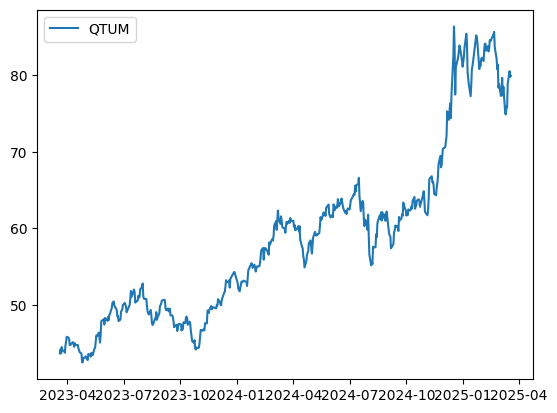

In [50]:
# Absolute value
absStock = 'QTUM'
plt.plot(dates, data[absStock], label=absStock)
plt.legend(loc='upper left')